# Clone GitHub-Repo

In [ ]:
!git clone https://github.com/julian-steiner-ai/forest-fire-smoke-detection.git

Cloning into 'forest-fire-smoke-detection'...
remote: Enumerating objects: 274, done.
remote: Counting objects: 100% (274/274), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 274 (delta 119), reused 268 (delta 116), pack-reused 0
Receiving objects: 100% (274/274), 14.83 MiB | 17.47 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [ ]:
%cd forest-fire-smoke-detection/

/content/forest-fire-smoke-detection


In [ ]:
!git submodule init
!git submodule update

Submodule 'tensorflow-models' (https://github.com/julian-steiner-ai/tensorflow-models.git) registered for path 'tensorflow-models'
Cloning into '/content/forest-fire-smoke-detection/tensorflow-models'...
Submodule path 'tensorflow-models': checked out 'f2e1a77e5952454fe761e5596785a125577f8105'


# Verify TensorFlow Installation

In [ ]:
!python -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"

2022-06-22 09:32:42.147164: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
tf.Tensor(-428.55176, shape=(), dtype=float32)


# Protobuf Installation/Compilation

In [ ]:
%cd /content/forest-fire-smoke-detection/tensorflow-models/research

/content/forest-fire-smoke-detection/tensorflow-models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

# COCO API installation

In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 10.23 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
%cd cocoapi/PythonAPI

/content/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskA

In [ ]:
!cp -r pycocotools /content/forest-fire-smoke-detection/tensorflow-models/research

# Install the Object Detection API

In [ ]:
%cd /content/forest-fire-smoke-detection/tensorflow-models/research

/content/forest-fire-smoke-detection/tensorflow-models/research


In [ ]:
!cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install --use-feature=2020-resolver .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/forest-fire-smoke-detection/tensorflow-models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.3 MB 2.2 MB/s 
     |████████████████████████████████| 352 kB 47.3 MB/s 
     |████████████████████████████████| 2.1 MB 53.9 MB/s 
     |████████████████████████████████| 25.9 MB 69.5 MB/s 
     |████████████████████████████████| 67 kB 7.7 MB/s 
     |████████████████████████████████| 4.6 MB 72.4 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |█████████████████████

# Test the Installation

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-06-22 09:34:57.926670: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0622 09:34:58.151121 140082864580480 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.37s
I0622 09:34:58.516793 140082864580480 test_util.py:2459] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.37s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.5s
I0622 09:34:59.019099 140082864580480 test_ut

# Download Pre-Trained Model

Overview over [TensorFlow Models](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md)

In [ ]:
%cd /content/forest-fire-smoke-detection/workspace/pre-trained-models

/content/forest-fire-smoke-detection/workspace/pre-trained-models


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2022-06-22 09:36:52--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 216.58.220.208, 2404:6800:4003:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|216.58.220.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   148MB/s    in 1.6s    

2022-06-22 09:36:54 (148 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [ ]:
!tar -xvf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


# Training the Model

In [ ]:
%cd /content

/content


In [ ]:
%cp /content/forest-fire-smoke-detection/tensorflow-models/research/object_detection/model_main_tf2.py /content/forest-fire-smoke-detection/workspace/model_main_tf2.py

In [ ]:
%cd /content/forest-fire-smoke-detection/workspace/

/content/forest-fire-smoke-detection/workspace


In [ ]:
!pip install "opencv-python-headless<4.3"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade tensorflow tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 47 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 6s (67.2 MB/s)
(Reading database ... 155639 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155617 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+c

In [ ]:
!python model_main_tf2.py --model_dir=/content/forest-fire-smoke-detection/workspace/models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8 --pipeline_config_path=/content/forest-fire-smoke-detection/workspace/models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config

2022-06-22 09:53:47.582795: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0622 09:53:47.588723 139944945588096 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0622 09:53:47.592816 139944945588096 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0622 09:53:47.592992 139944945588096 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0622 09:53:47.739480 139944945588096 deprecation.py:356] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experimental

# Exporting the Trained Model

In [ ]:
%cp /content/forest-fire-smoke-detection/tensorflow-models/research/object_detection/exporter_main_v2.py /content/forest-fire-smoke-detection/workspace//exporter_main_v2.py

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/forest-fire-smoke-detection/workspace/models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config --trained_checkpoint_dir /content/forest-fire-smoke-detection/workspace/models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8 --output_directory /content/forest-fire-smoke-detection/workspace/exported-models/my_ssd_resnet50_v1_fpn

2022-06-22 11:26:47.041698: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0622 11:26:47.182607 140371691112320 deprecation.py:628] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0622 11:27:05.823471 1403716911123

In [ ]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
labelmap_path = '/content/forest-fire-smoke-detection/annotations/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [ ]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/content/forest-fire-smoke-detection/workspace/exported-models/my_ssd_resnet50_v1_fpn/saved_model/')

In [ ]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [ ]:
test_images = ['/content/forest-fire-smoke-detection/data/test/F_20.jpg',
               '/content/forest-fire-smoke-detection/data/test/ck0m0f8x4hwsq0838adn9hkti_jpeg.rf.02c20dbd46efee307ec38486fc3f5da2.jpg']

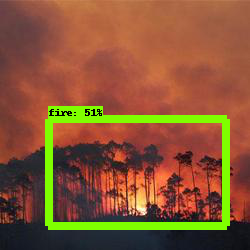

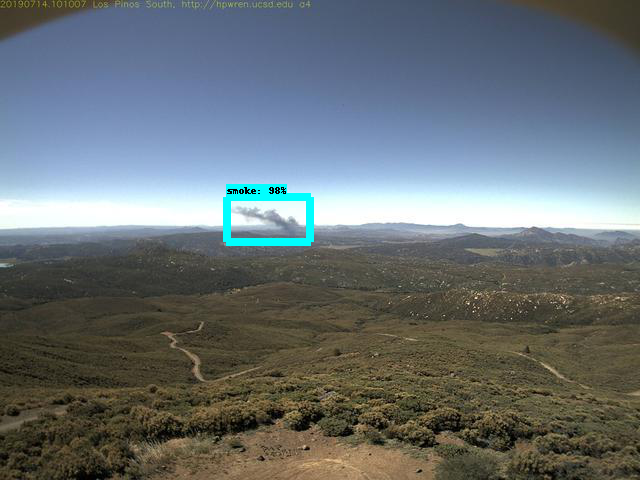

In [ ]:
for image_path in test_images:
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))

In [ ]:
%cd /content/forest-fire-smoke-detection

/content/forest-fire-smoke-detection


In [ ]:
!git config --global user.email "julian-steiner-ai"
!git config --global user.name "Julian Steiner"

In [ ]:
!git add --all
!git commit -m "Trained new model."
!git push origin main

On branch main
Your branch is ahead of 'origin/main' by 2 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
